# Imports

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as st 
import seaborn as sns

# Initial Data Cleansing and Feature Engineering

In [2]:
df = pd.read_csv('/home/nasibul/Desktop/e-commerce/object-pos/output.csv', index_col=0)
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97805 entries, 0 to 97804
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Customer Name              97805 non-null  object        
 1   Transaction Date and Time  97805 non-null  datetime64[ns]
 2   Customer Age               97805 non-null  int64         
 3   Location                   97805 non-null  object        
 4   Discount                   97805 non-null  float64       
 5   SKU ID                     97805 non-null  int64         
 6   Quantity                   97805 non-null  int64         
 7   Price                      97805 non-null  float64       
 8   Name                       97805 non-null  object        
 9   Description                97805 non-null  object        
 10  Amount Spent in USD        97805 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage:

In [3]:
df.head(15)

,Customer Name,Transaction Date and Time,Customer Age,Location,Discount,SKU ID,Quantity,Price,Name,Description,Amount Spent in USD
0,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,32,1,4.0,Peanut Butter,Jiffy Creamy Peanut Butter,4.0
1,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,3,2,3.0,Milk,Horizon 2% Milk,6.0
2,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,6,3,3.0,Sandwich Bread,Wonder Bread Sandwich Bread,9.0
3,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,9,1.0,Sweet Peas,Green Giant Sweet Peas,9.0
4,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,17,1,6.0,Three Cheese Tortellini,Buitoni Three Cheese Tortellini,6.0
5,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,11,1,4.0,Whole Wheat English Muffin,Oroweat 100% Whole Wheat English Muffin,4.0
6,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,8,1.0,Sweet Peas,Green Giant Sweet Peas,8.0
7,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,22,4,2.0,Apple Juice,Mott’s Natural Apple Juice,8.0
8,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,20,9,6.0,Bologna,Wegmans Wunderbar German Deli Bologna,54.0
9,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,33,7,1.0,Green Beans,Del Monte Green Beans,7.0


In [4]:
# 3 new raw data features: discount, weight, volume
df["Item Discount in %"] = [round(random.uniform(10, 30), 2) for i in range(0,len(df))]
df["Weight in grams"] = [round(random.uniform(0, 5000), 2) for i in range(0,len(df))]
df["Volume in liters"] = [round(random.uniform(0, 2), 2) for i in range(0,len(df))]

The weights and volumes are randomly populated and then manually cleaned to simulate messy real world data.

In [5]:
weights_dict = {1:400, 2:340, 3:900, 4:600, 5:1360, 6:566, 7:470, 8:269, 9:1360, 10:7, \
                11:394, 12:532, 13:600, 14: 500, 15:305, 16:629, 17:255, 18:650, 19:637, 20:454, \
                21: 250, 22:2063, 23:439, 24:425, 25:460, 26:300, 27:93, 28:300, 29:187, 30:340, \
                31:450, 32:900, 33:439, 34:340}
volumes_dict = {1:0.4, 2:0.2, 3:1.89, 4:0.9, 5:1.41, 6:2, 7:0.25, 8:0.10, 9:1, 10:0.05, \
                11:1, 12:2, 13:0.5, 14:0.7, 15:0.3, 16:2, 17:0.6, 18:0.2, 19:2, 20:0.6, \
                21:0.3, 22:1.89, 23:0.4, 24:0.4, 25:0.4, 26:0.5, 27:0.05, 28:0.45, 29:1.2, 30:1.2, \
                31:1, 32:0.6, 33:0.5, 34:1.2}

def correct_weights(x, weight):
    interval = st.norm.interval(confidence=0.95, loc=weights_dict[x], scale=20)
    if weight<interval[0] or weight>interval[1]:
        random.seed(5)
        weight = round(random.uniform(interval[0], interval[1]), 2)
        return weight
    else:
        return weight
    
def correct_volumes(x, volume):
    interval = st.norm.interval(confidence=0.95, loc=volumes_dict[x], scale=0.05)
    if volume<interval[0] or volume>interval[1]:
        random.seed(5)
        volume = round(random.uniform(interval[0], interval[1]), 2)
        return volume
    else:
        return volume

df["Weight in grams"] = df.apply(lambda row: correct_weights(row['SKU ID'], row["Weight in grams"]), axis=1)
df["Volume in liters"] = df.apply(lambda row: correct_volumes(row['SKU ID'], row["Volume in liters"]), axis=1)

In [6]:
# 3 new composite features
df['Total'] = df['Amount Spent in USD']*((100-df['Item Discount in %'])/100)

def weights(x):
    if x < 200:
        return 'Light'
    elif x < 600:
        return 'Medium'
    else:
        return 'Heavy'

df['Weight Class'] = df['Weight in grams'].apply(weights)

def shipping(x):
    if x == 'Light':
        return 0.02
    elif x == 'Medium':
        return 0.1
    else:
        return 0.2 
    
df['Shipping Charge'] = df['Quantity'] * df['Weight Class'].apply(shipping)

# EDA

## Top 5 Items By Amount Sold from 2018-2020

Text(0.5, 1.0, 'Top 5 Item Sales from 2018-2020')

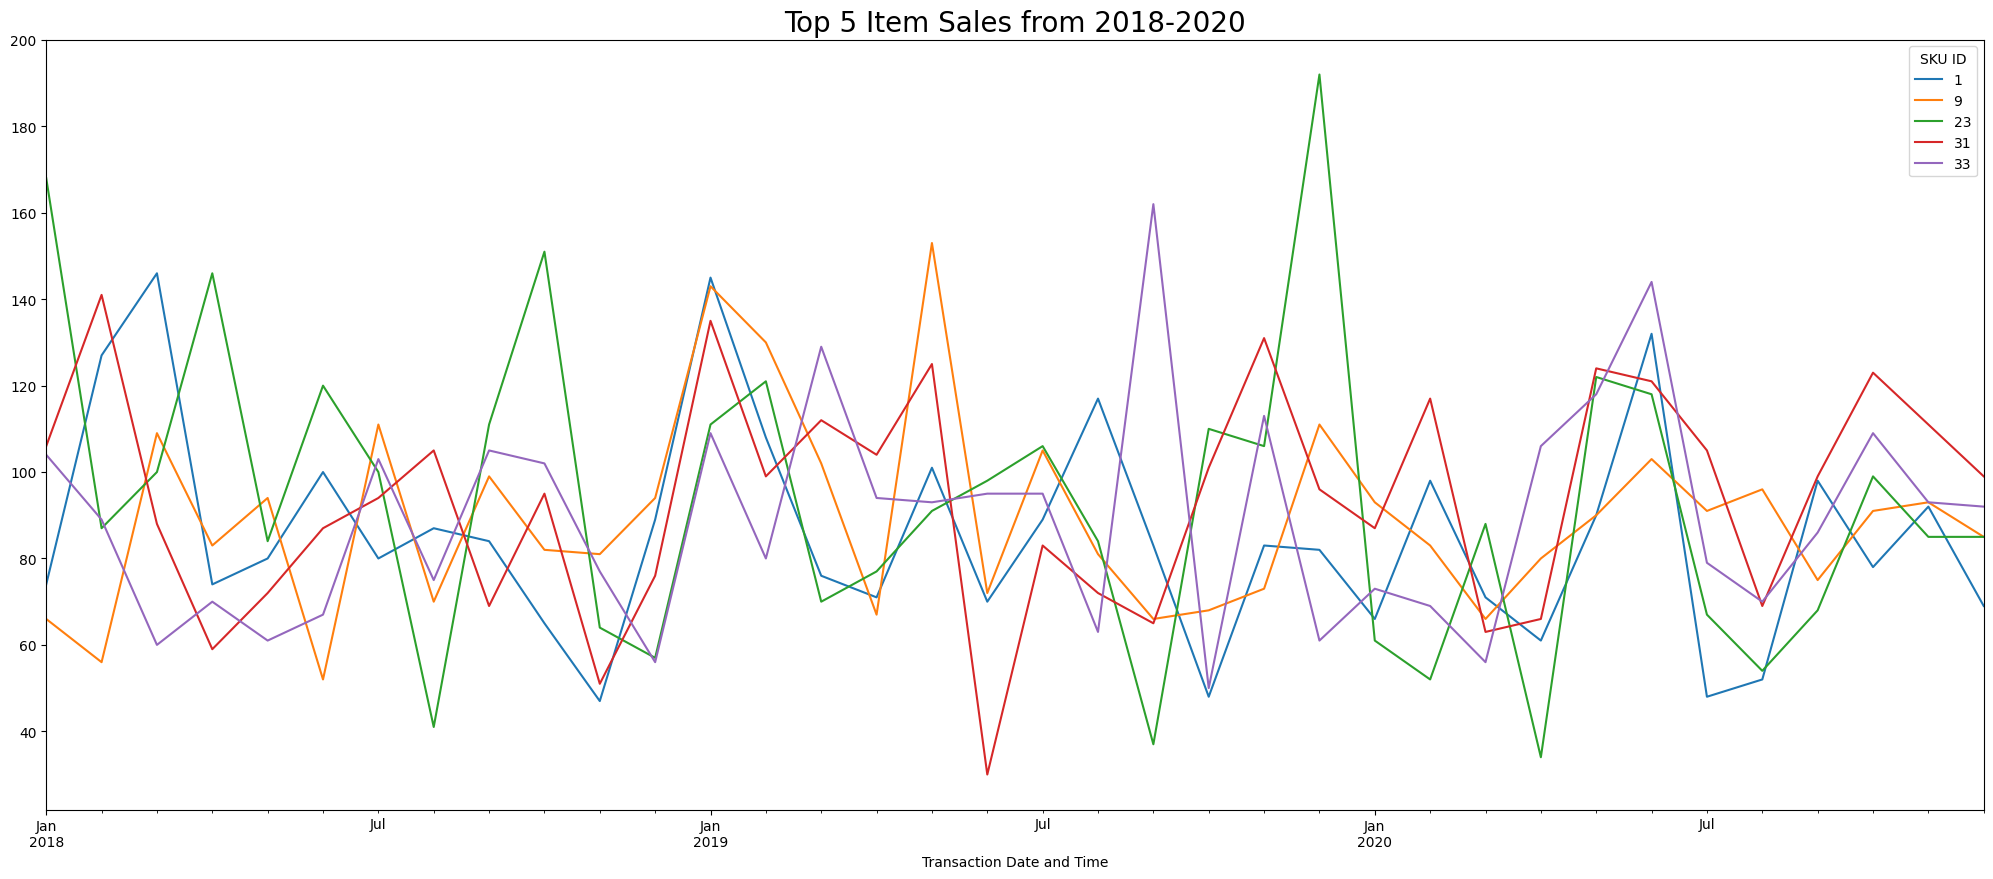

In [7]:
#time series plot of top 5 items sold by quantity from 2018-2020 
top_5_sold = list(df.groupby('SKU ID')['Quantity'].sum().sort_values().iloc[0:5].index)
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2020') & (df['SKU ID'].isin(top_5_sold))]
pd.pivot_table(window, values='Quantity', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum).resample('M').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Sales from 2018-2020', size=20)

## Top 5 Items Revenues from 2018-2020

Text(0.5, 1.0, 'Top 5 Item Revenues from 2018-2020')

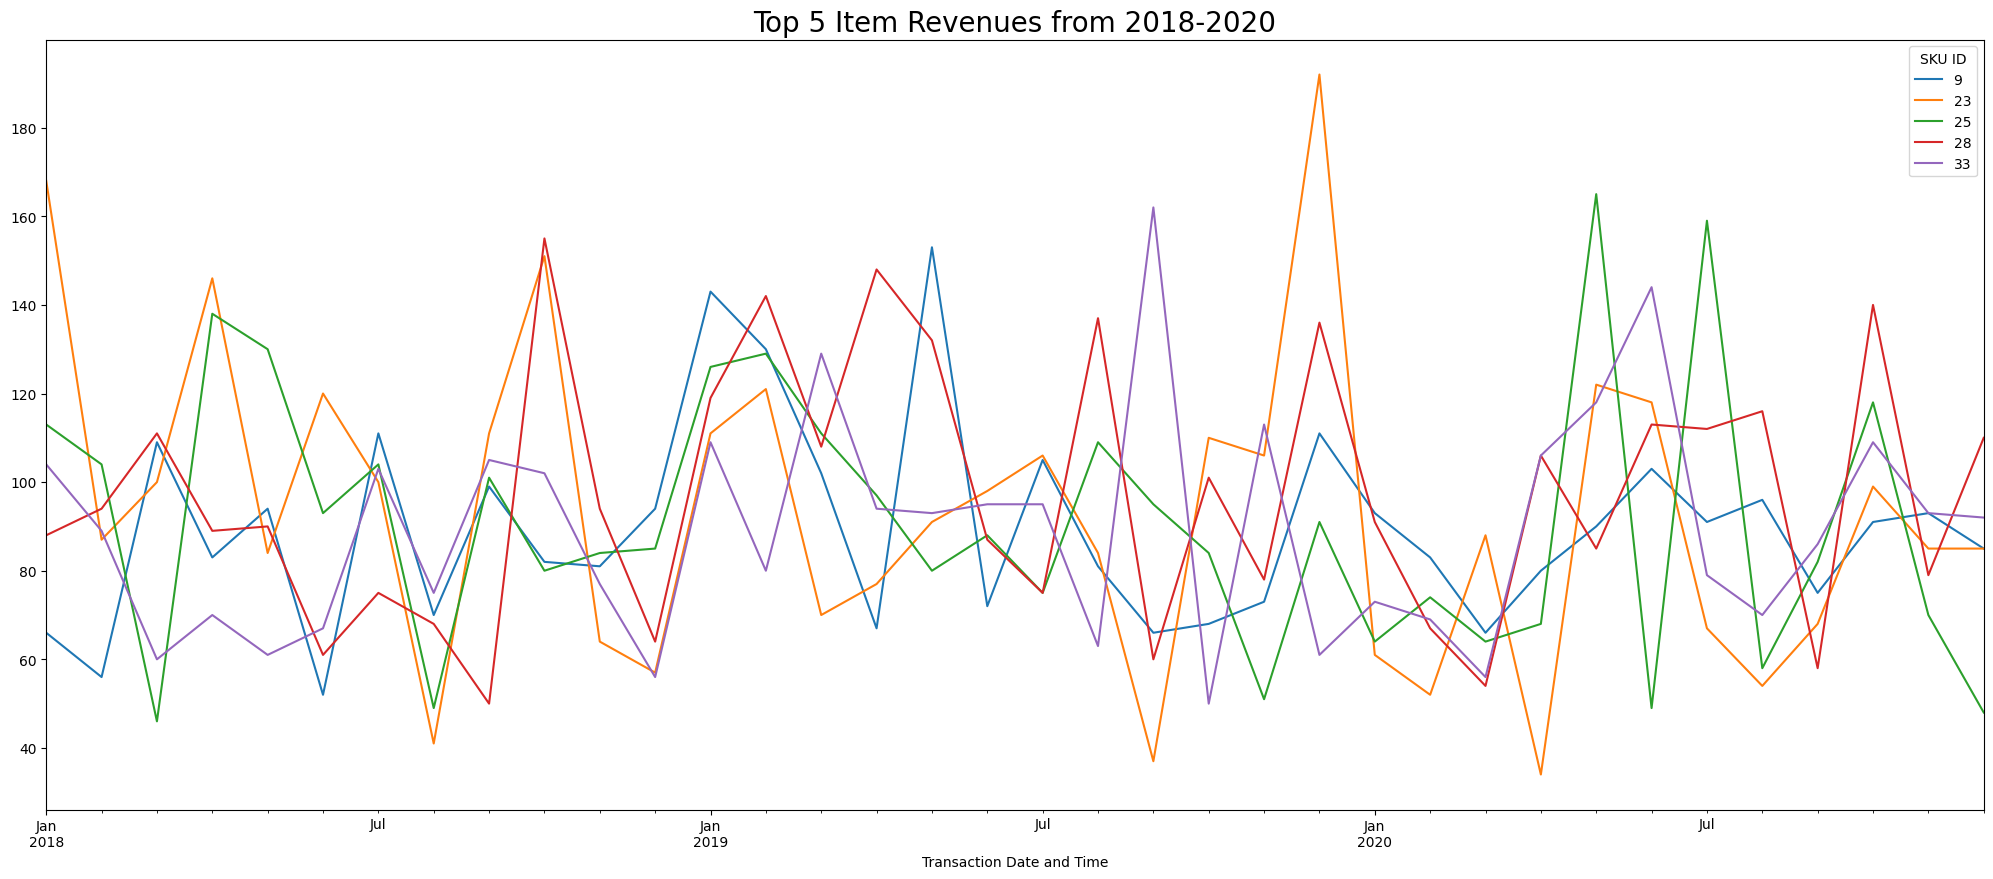

In [8]:
# repeat for top 5 items by revenue
top_5_rev = list(df.groupby('SKU ID')['Amount Spent in USD'].sum().sort_values().iloc[0:5].index)
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2020') & (df['SKU ID'].isin(top_5_rev))]
pd.pivot_table(window, values='Amount Spent in USD', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum).resample('M').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Revenues from 2018-2020', size=20)

## Top 5 Items Revenues in 2018

Text(0.5, 1.0, 'Top 5 Item Revenues in 2018')

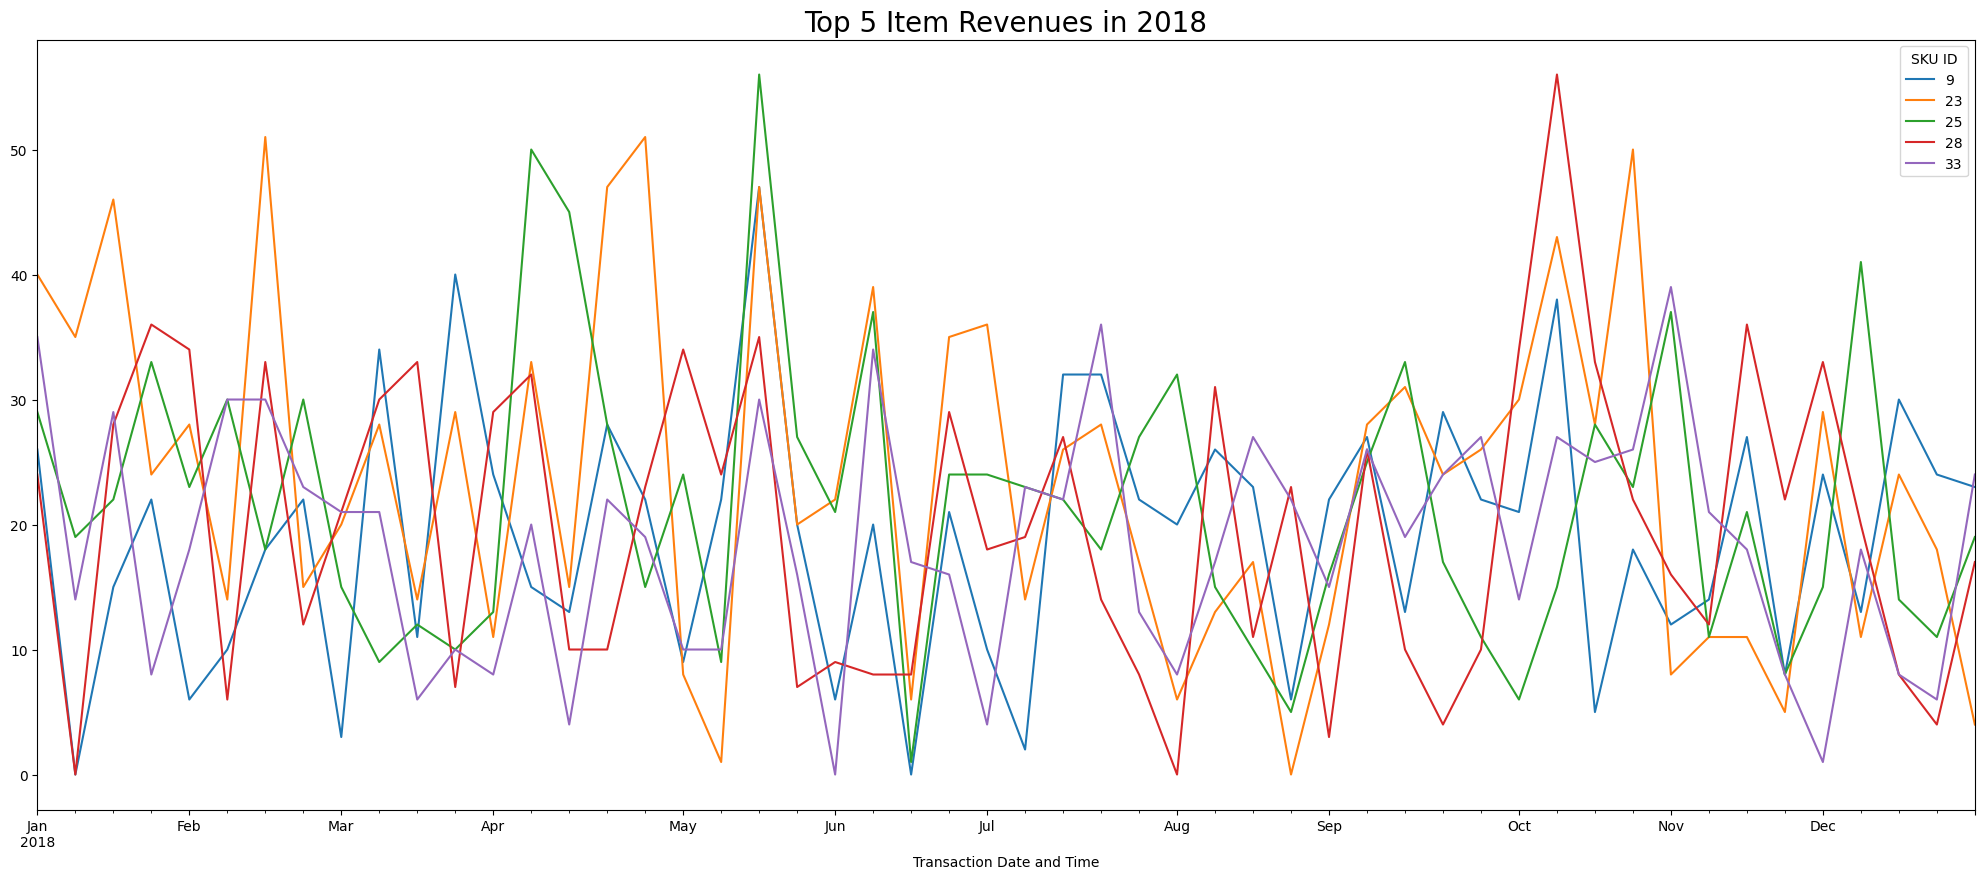

In [9]:
#1st plot is 2018 of top 5 products by revenue
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2018') & (df['SKU ID'].isin(top_5_rev))]
pivot_top_5 = pd.pivot_table(window, values='Amount Spent in USD', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum)
pivot_top_5.resample('W').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Revenues in 2018', size=20)

## 2018 and 2019 Sales of the Most Volatile Product Grouped by Month

In [10]:
#2nd plot of 2018 and 2019, bar graph, identify volatile product in terms of sales per week
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2019')]
vol = window.groupby('SKU ID').resample('M', on='Transaction Date and Time').std(numeric_only=True).sort_values(by=['Quantity'],ascending=False)[0:20]
vol

,,Customer Age,Discount,SKU ID,Quantity,Price,Amount Spent in USD,Item Discount in %,Weight in grams,Volume in liters,Total,Shipping Charge
SKU ID,Transaction Date and Time,,,,,,,,,,,
23,2018-08-31,10.737119,0.0,0.0,3.976119,0.0,3.976119,6.470537,17.390145,0.000000,3.203264,0.397612
26,2018-09-30,20.524929,0.0,0.0,3.931227,0.0,3.931227,5.049920,0.000000,0.000000,3.057718,0.393123
29,2018-05-31,19.433196,0.0,0.0,3.885797,0.0,15.543186,5.313759,0.000000,0.031687,12.663970,0.077716
11,2019-10-31,22.277588,0.0,0.0,3.806693,0.0,15.226771,5.301602,0.000000,0.011362,12.710249,0.380669
32,2019-02-28,23.407483,0.0,0.0,3.715870,0.0,14.863481,6.361148,0.000000,0.019215,11.176005,0.743174
7,2019-11-30,18.232101,0.0,0.0,3.700708,0.0,7.401416,4.635540,7.474858,0.018074,6.150567,0.370071
9,2018-01-31,17.437802,0.0,0.0,3.662002,0.0,3.662002,6.942706,0.000000,0.000000,2.856804,0.732400
25,2018-08-31,23.377339,0.0,0.0,3.643869,0.0,3.643869,6.473156,0.000000,0.000000,3.031756,0.364387
9,2018-10-31,19.147262,0.0,0.0,3.617315,0.0,3.617315,6.678111,0.000000,0.000000,3.113725,0.723463


Text(0.5, 1.0, '2018 and 2019 Sales of Most Volatile Product Grouped by Month')

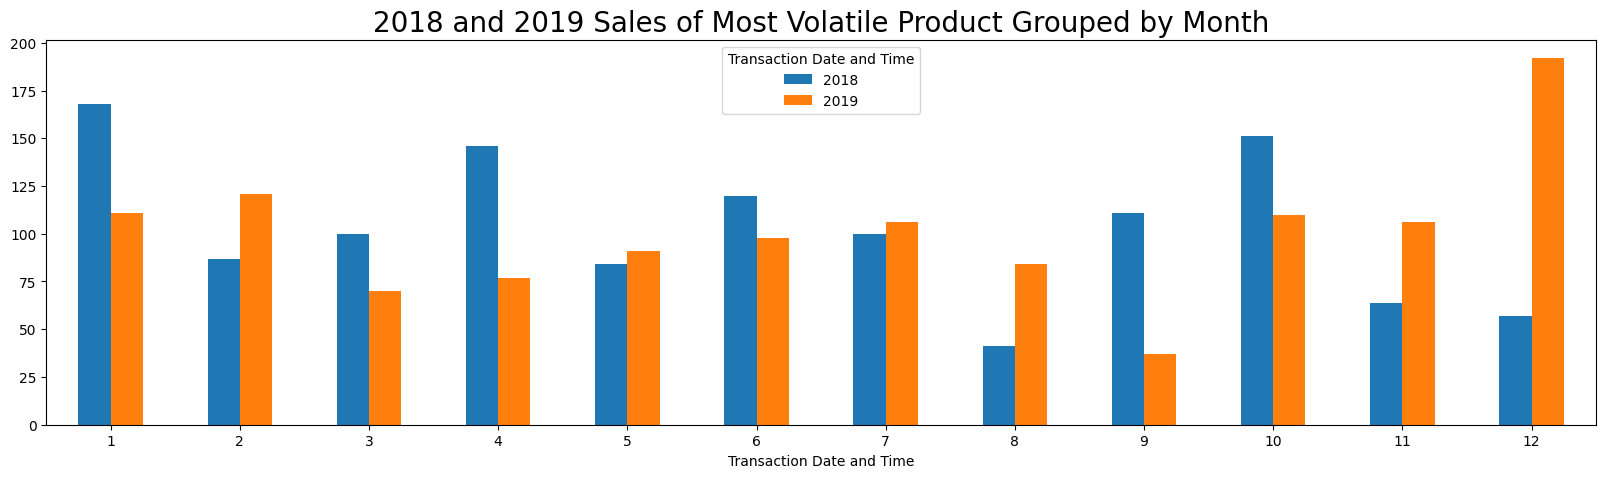

In [11]:
most_vol = vol.index[0][0]
vol_months= window[window["SKU ID"]==most_vol].groupby(by=[window['Transaction Date and Time'].dt.year, window['Transaction Date and Time'].dt.month])\
                                              .sum(numeric_only=True)['Quantity']
vol_months.unstack(level=0).plot(kind='bar', figsize=(20,5), rot=0)
plt.title('2018 and 2019 Sales of Most Volatile Product Grouped by Month', size=20)

## Multi-year Histograms of Sales of Most Volatile Item

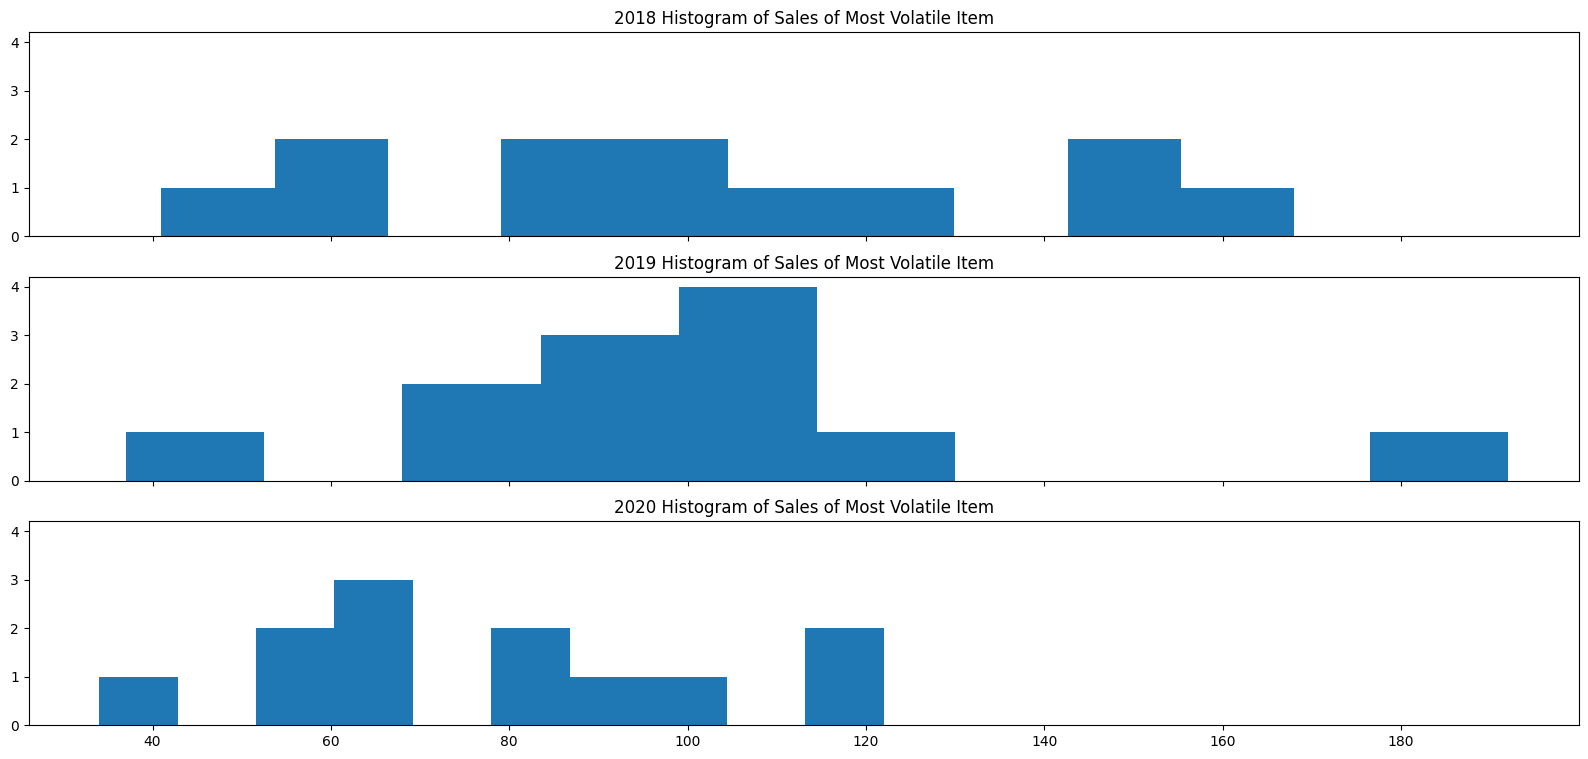

In [12]:
#3rd plot is comparing 2018,2019,2020 histograms of most volatile item
vol_hist_prep = df[(df["SKU ID"]==most_vol) & df['Transaction Date and Time'].dt.year.isin([2018, 2019, 2020])]\
          .groupby(by=[df['Transaction Date and Time'].dt.year, df['Transaction Date and Time'].dt.month])\
          .sum(numeric_only=True)['Quantity']
vol_hist = pd.DataFrame(vol_hist_prep.unstack(level=0))

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(20,9)
ax1.hist(vol_hist[2018])
ax1.title.set_text('2018 Histogram of Sales of Most Volatile Item')
ax2.hist(vol_hist[2019])
ax2.title.set_text('2019 Histogram of Sales of Most Volatile Item')
ax3.hist(vol_hist[2020])
ax3.title.set_text('2020 Histogram of Sales of Most Volatile Item')

## Total Sales Graphed Monthly

Text(0.5, 1.0, 'Total Sales Graphed Monthly')

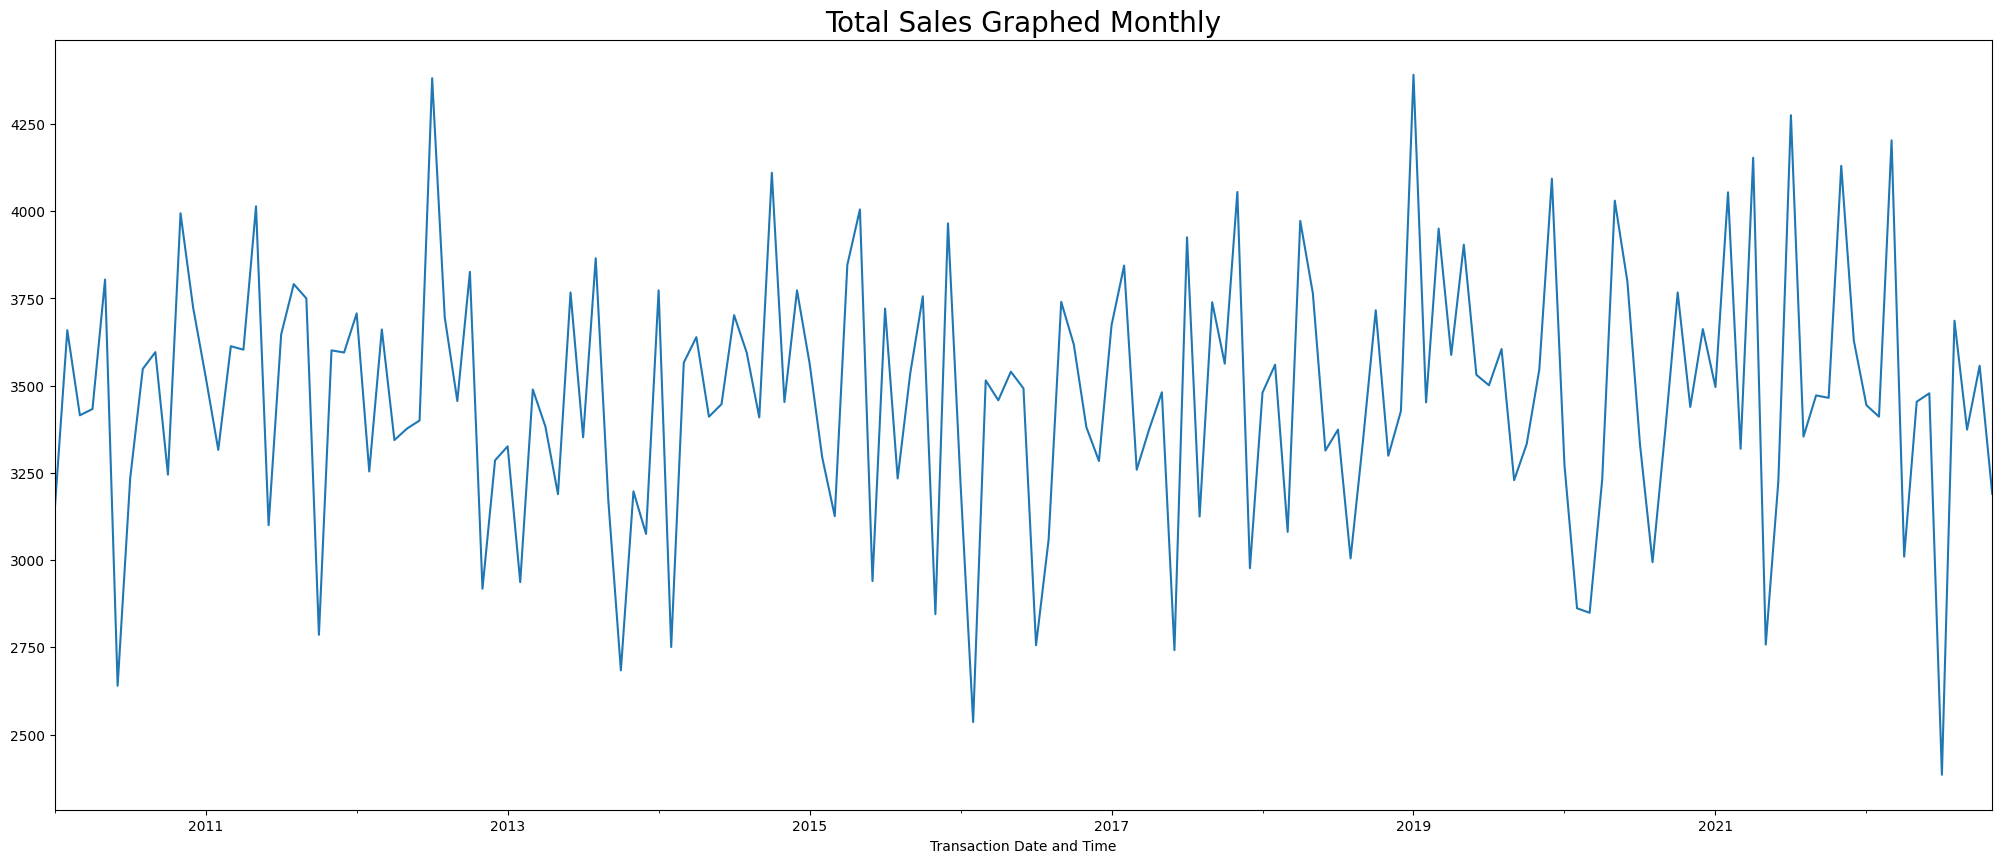

In [13]:
#graph total sales on weekly basis 
df.resample('M', on='Transaction Date and Time').sum(numeric_only=True)['Quantity'].plot(kind='line', figsize=(25,10))
plt.title('Total Sales Graphed Monthly', size=20)

## Total Revenue Graphed Weekly

Text(0.5, 1.0, 'Total Revenue Graphed Weekly')

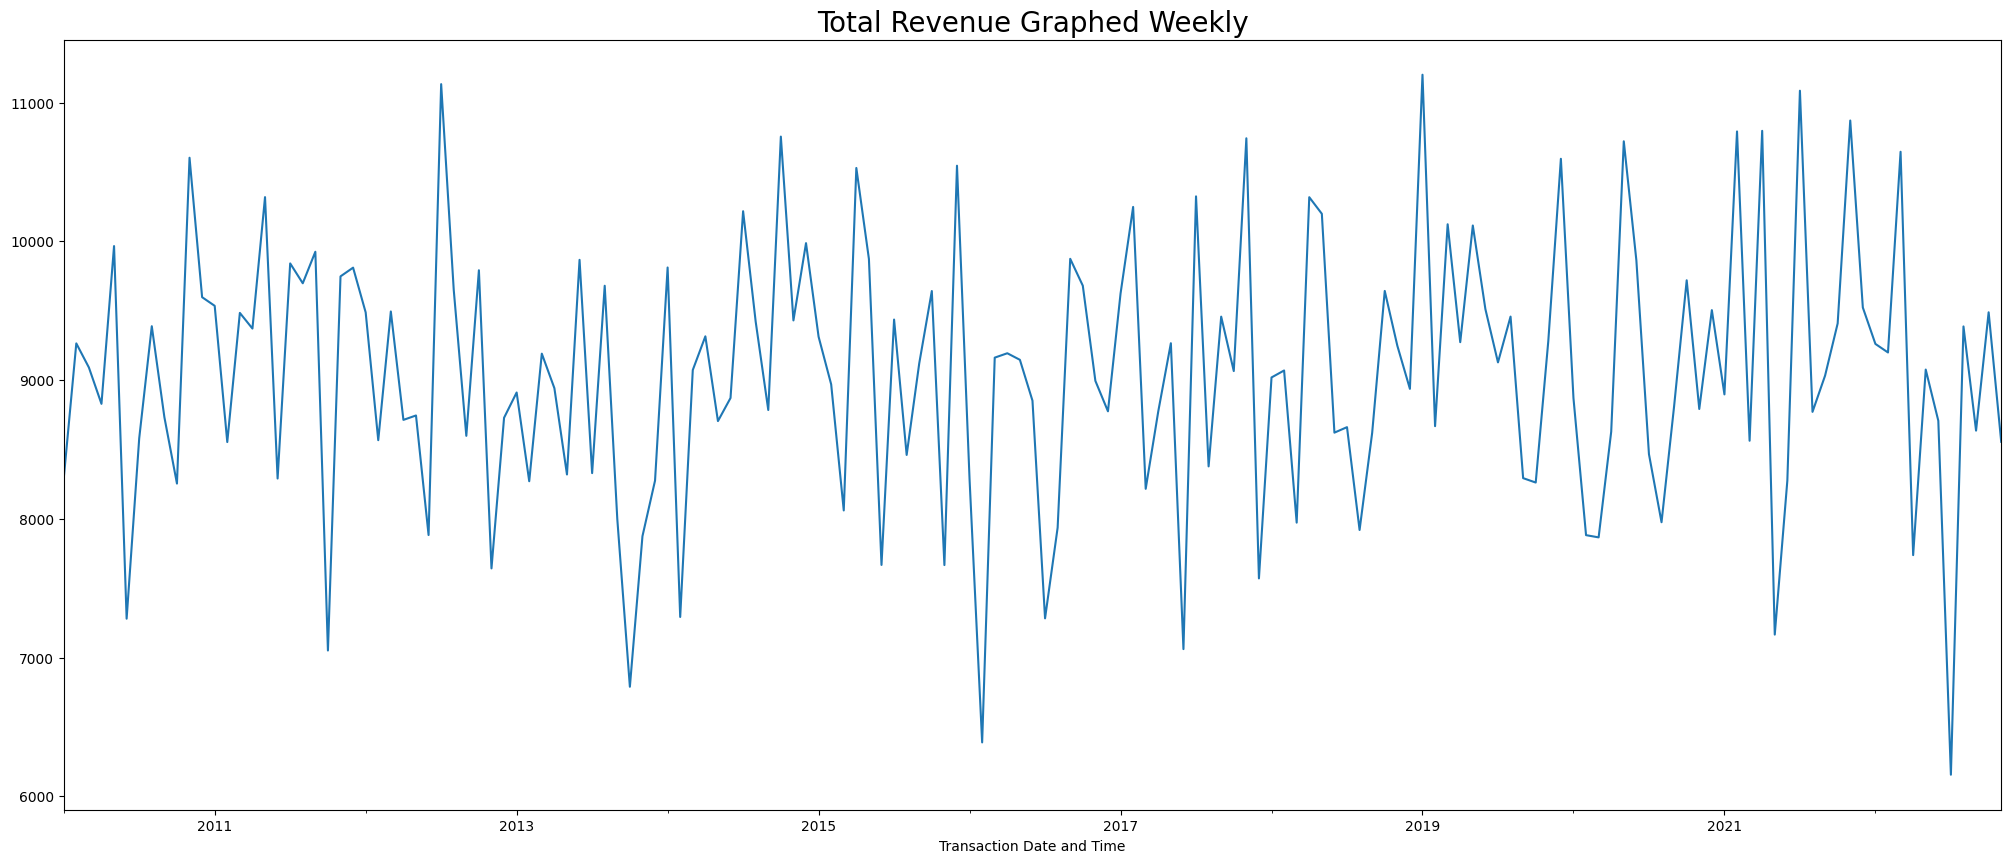

In [14]:
df.resample('M', on='Transaction Date and Time').sum(numeric_only=True)['Total'].plot(kind='line', figsize=(25,10))
plt.title('Total Revenue Graphed Weekly', size=20)

## Correlations

<AxesSubplot: >

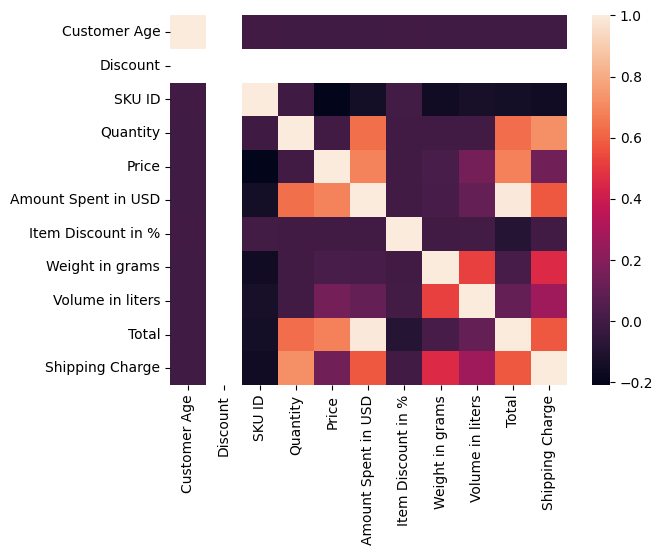

In [15]:
sns.heatmap(df.corr(numeric_only=True))

In [16]:
# correlation between price and rev
df['Price'].corr(df['Total'])

0.6815474370982845

## Average Number of Items in Cart

In [17]:
df.groupby('Customer Name')['Quantity'].sum().mean()

27.3783082247557

## Boxplot of Customer Age

<AxesSubplot: >

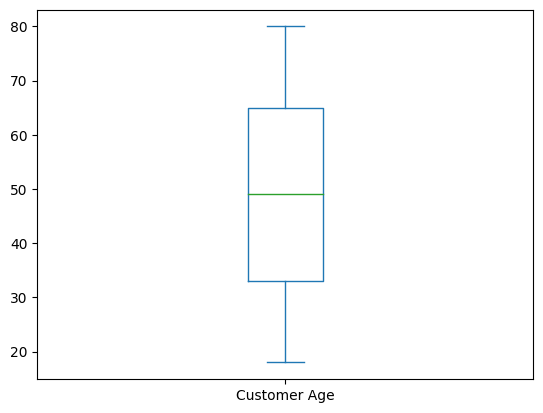

In [18]:
df.groupby('Customer Name').mean(numeric_only=True)['Customer Age'].plot(kind='box')

## Location

In [19]:
df.groupby(by=['Customer Name'])['Location'].unique().value_counts()

[San Diego]          924
[Phoenix]            880
[Seattle]            879
[San Francisco]      878
[Houston]            876
[Trenton]            873
[Las Vegas]          873
[Miami]              871
[Washington D.C.]    865
[Hartford]           852
[Philadelphia]       852
[New York City]      852
[Dallas]             850
[Atlanta]            844
[Detroit]            839
[Los Angeles]        838
[Baltimore]          837
[Denver]             836
[Nashville]          833
[Boston]             832
[Newark]             831
[Austin]             818
[Chicago]            815
Name: Location, dtype: int64

# ARIMA

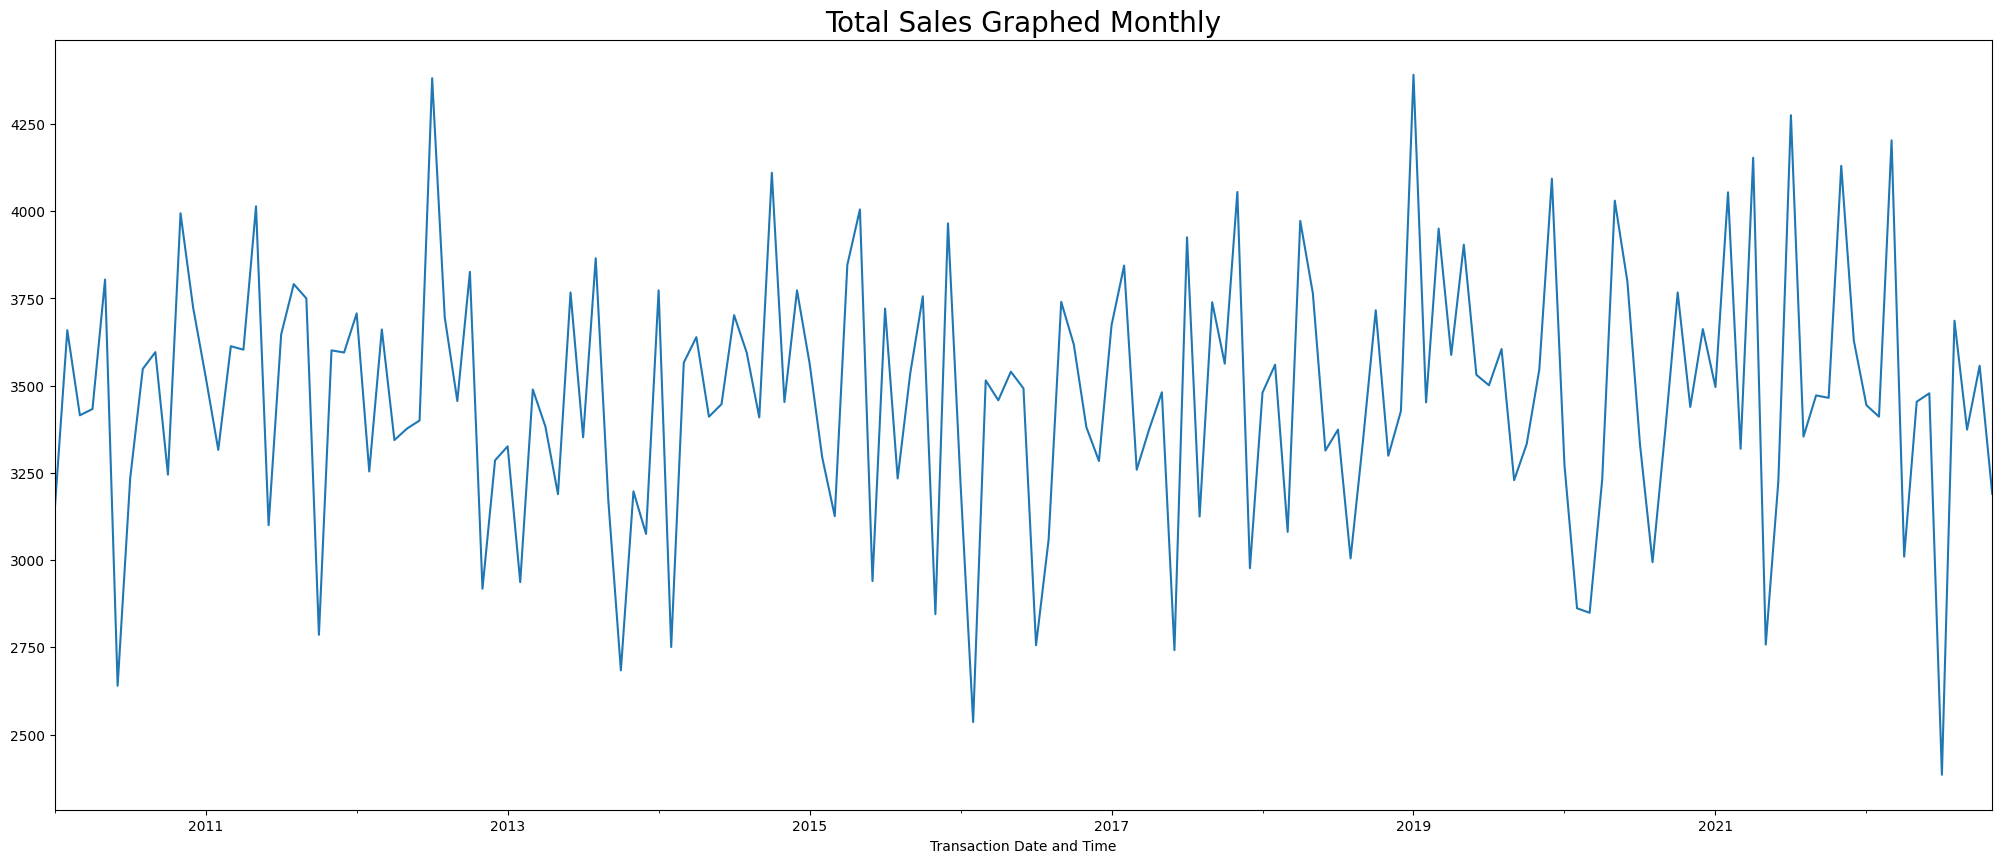

In [20]:
df = df.sort_values(by='Transaction Date and Time')
df = df.set_index('Transaction Date and Time')
df.resample('M').sum(numeric_only=True)['Quantity'].plot(kind='line', figsize=(25,10))
plt.title('Total Sales Graphed Monthly', size=20)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm

y = df['Quantity']
X = df.drop(['Quantity', 'Customer Name', 'Discount'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, shuffle=False)
model = pm.auto_arima(y=y_train, X=X_train, n_jobs=-1, trace=True, stepwise=False, seasonal=False, random_state=5)
pred = model.predict(n_periods=len(X_test), X=X_test)

/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,4)(0,0,0)[0]             : AIC=214902.330, Time=668.90 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=214904.147, Time=717.93 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=214897.393, Time=468.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214904.392, Time=464.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=214899.285, Time=538.22 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=214900.329, Time=480.95 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=214901.078, Time=569.93 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=214902.329, Time=469.20 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=214900.331, Time=584.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=214902.328, Time=460.90 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=214899.343, Time=532.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=214903.312, Time=516.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=214899.277, Time=571.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=214904.968, Time=480.68 sec
 ARIMA(0,0,1)(0,0,0)

/home/nasibul/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: xlabel='Transaction Date and Time'>

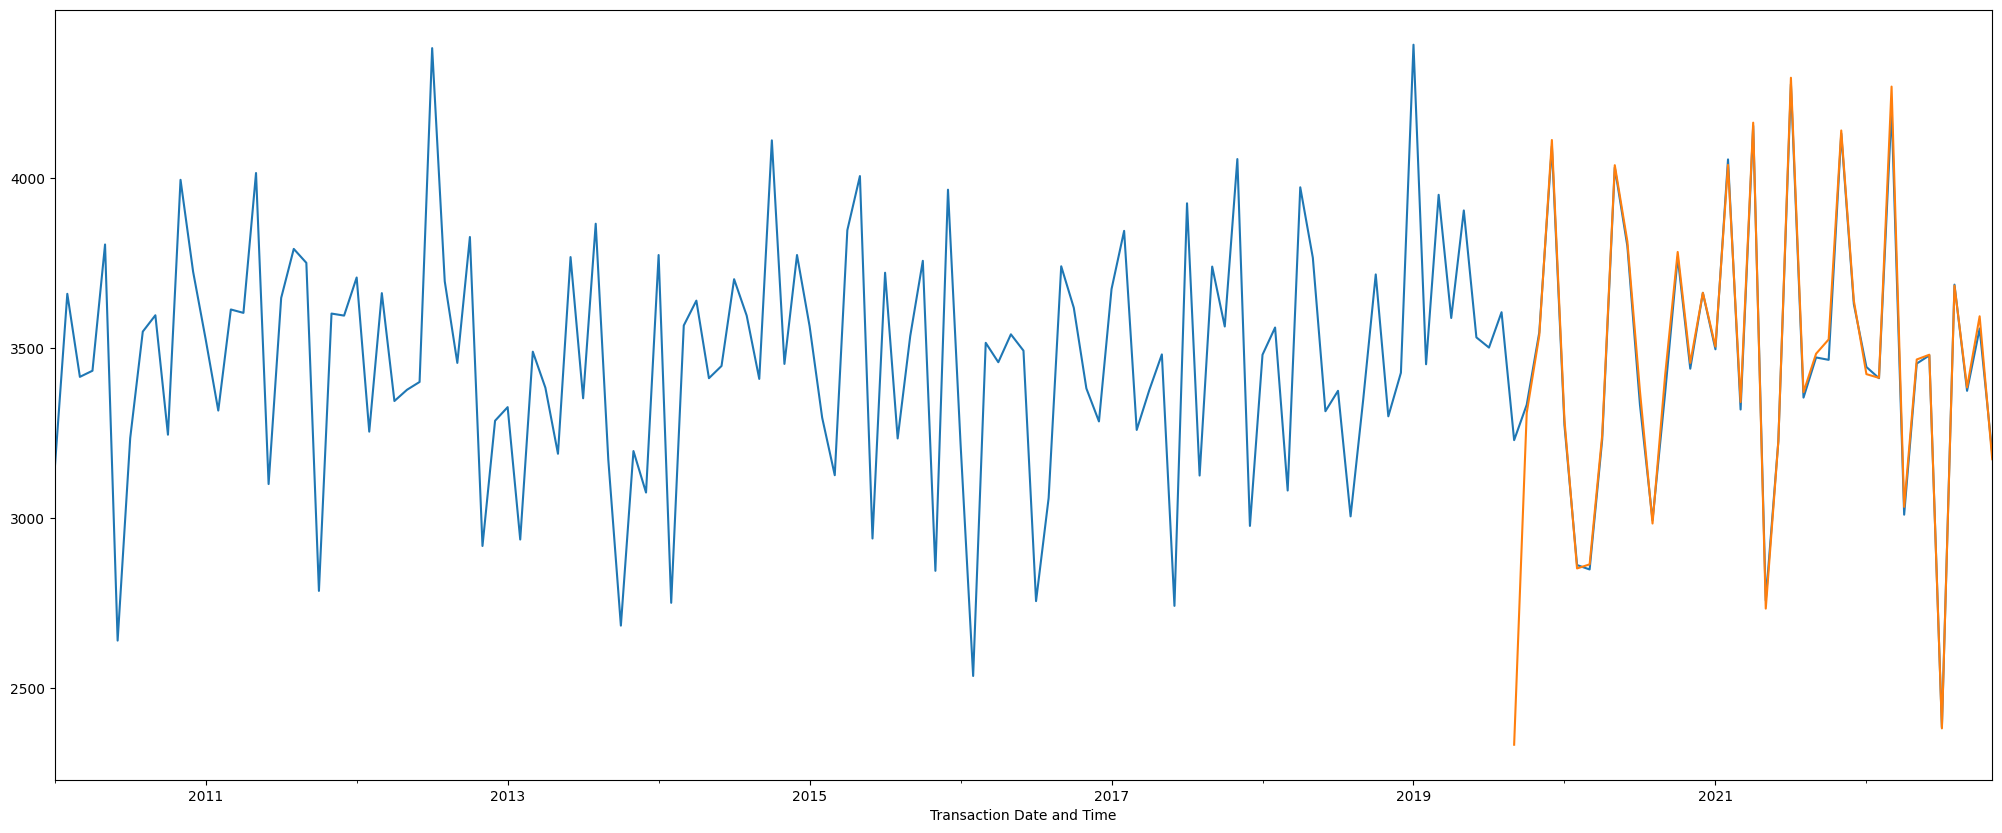

In [22]:
pred.index = y_test.index
pred = round(pred)
df.resample('M').sum(numeric_only=True)['Quantity'].plot(kind='line', figsize=(25,10))
pred.resample('M').sum(numeric_only=True).plot(kind='line', figsize=(25,10))

In [23]:
pred.resample('M').sum(numeric_only=True)

Transaction Date and Time
2019-09-30    2334.0
2019-10-31    3309.0
2019-11-30    3537.0
2019-12-31    4111.0
2020-01-31    3288.0
2020-02-29    2852.0
2020-03-31    2864.0
2020-04-30    3244.0
2020-05-31    4037.0
2020-06-30    3813.0
2020-07-31    3373.0
2020-08-31    2984.0
2020-09-30    3419.0
2020-10-31    3782.0
2020-11-30    3456.0
2020-12-31    3662.0
2021-01-31    3504.0
2021-02-28    4038.0
2021-03-31    3341.0
2021-04-30    4162.0
2021-05-31    2734.0
2021-06-30    3225.0
2021-07-31    4294.0
2021-08-31    3370.0
2021-09-30    3483.0
2021-10-31    3525.0
2021-11-30    4139.0
2021-12-31    3639.0
2022-01-31    3423.0
2022-02-28    3412.0
2022-03-31    4268.0
2022-04-30    3033.0
2022-05-31    3466.0
2022-06-30    3480.0
2022-07-31    2382.0
2022-08-31    3683.0
2022-09-30    3384.0
2022-10-31    3593.0
2022-11-30    3173.0
Freq: M, dtype: float64

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=214900.657, Time=1554.80 sec


The orange plot is the predictions from the ARIMA model. The reason why the first few predictions of the model are grossly off and then snap much closer to the actual predictions is because the first month of the test set did not include all the sale from the month. 